<img src="Separator.png" alt="drawing"/>


<div style="text-align: center; background-color: #f0f0f0; padding: 20px; border-radius: 10px;">

<p style="text-align: center;"> Національний університет “Чернігівська політехніка”</p>

# Використання онлайн інструментів на базі Python

<p style="text-align: center; color: #B0B0B0;"> <i> В рамках програми підвищення кваліфікації </i> </p>
<p style="text-align: center; color: #B0B0B0;"> <i> "ДИСТАНЦІЙНІ ЛАБОРАТОРІЇ ТА ІНСТРУМЕНТИ ДИСТАНЦІЙНОГО НАВЧАННЯ В ОСВІТІ" </i> </p>

<p style="text-align: center;"><b> Пахалюк Богдан </b></p>
<p style="text-align: center;"> Кафедра радіотехнічних та вбудованих систем</p>

<p style="text-align: center;"> 2024 рік</p>

</div>

---
<img src="Separator.png" alt="drawing"/>

## Вступ

> **JupyterLab** — це новітнє веб-середовище інтерактивної розробки для блокнотів, коду та даних. Його гнучкий інтерфейс дозволяє користувачам налаштовувати та організовувати робочі процеси в галузі даних, наукових обчислень, комп’ютерної журналістики та машинного навчання. Модульна конструкція запрошує розширення для розширення та збагачення функціональності.

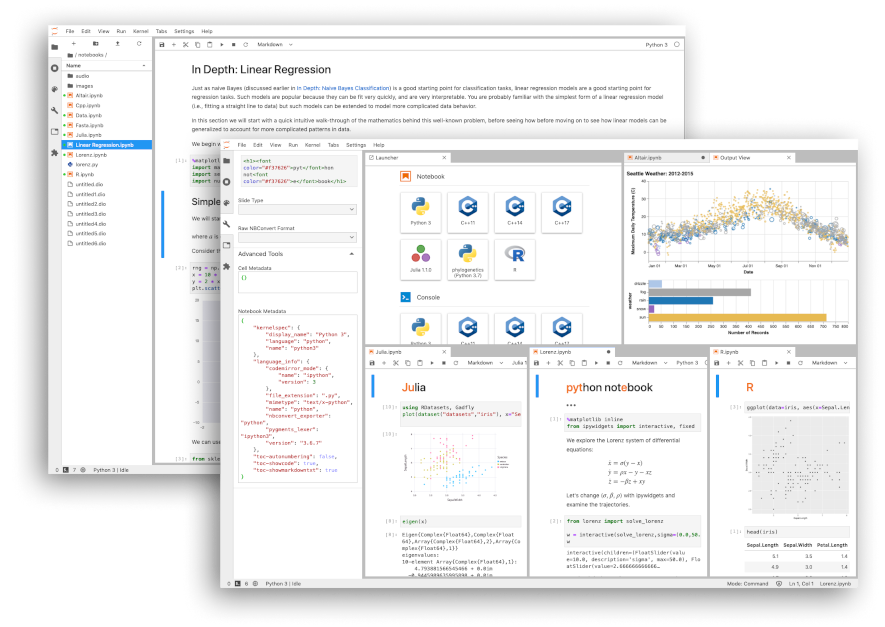

<img src="Separator.png" alt="drawing"/>

### Jupyter + Python + Бібліотеки

1. Символьна математика
   - ~~Maple~~
   - ~~Matchcad~~
   - **SymPy** - Free https://www.sympy.org/en/index.html
2. Математичні розрахунки
   - ~~Matlab~~
   - **NumPy** - Free https://numpy.org
   - **SciPy** - Free https://scipy.org
3. Побудова графіків
   - ~~Matlab~~
   - **Matplotlib** - Free https://matplotlib.org
4. Моделювання електричних схем
   - ~~Psim~~
   - ~~Plex~~
   - **PySpice** - Free https://pypi.org/project/PySpice/

<img src="Separator.png" alt="drawing"/>

### Інсталяція і налаштування бібліотек

1. Встановлення jupyter і додаткових бібліотек

> pip install jupyter matplotlib numpy pandas python-dateutil scipy pyspice sympy engineering_notation

2. Встановлення PySpice

> pip install PySpice

3. Встановлення ngspice

> pyspice-post-installation --install-ngspice-dll 
> pyspice-post-installation --check-install

4. Запуск

> jupyter notebook

<img src="Separator.png" alt="drawing"/>

### Використання binder

1. Лінк: https://mybinder.org

2. Файл **apt.txt**

> ngspice
> 
> libngspice0-dev

3. Файл **requirements.txt**   

> matplotlib
> 
> numpy
> 
> pandas
> 
> python-dateutil
> 
> scipy
> 
> pyspice
> 
> sympy
> 
> engineering_notation

<img src="Separator.png" alt="drawing"/>

## Імпорт бібліотек

In [1]:
import numpy as np
import sympy as smp
import scipy as sp

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import interactive, widgets, HBox, VBox

import math
from engineering_notation import EngNumber
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from matplotlib.pyplot import semilogx
from matplotlib import pyplot
%matplotlib inline

#logger = Logging.setup_logging()

import PySpice.Logging.Logging as Logging
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

<img src="Separator.png" alt="drawing"/>

## Використання SymPy

<img src="Separator.png" alt="drawing"/>

### Моделювання рівняння лінії

$$a+b \cdot t$$

In [7]:
def g(a_sb, b_sb):
    a, b, t = smp.symbols("a b t")
    expr = a + b * t 
    t_values = np.arange(0, 100, 1)
    # Use list comprehension to substitute each x value into the vector expression
    result_vector = [expr.subs([(a, a_sb), (b, b_sb), (t, tim)]) for tim in t_values]
    
    # Create a scatter plot
    plt.plot(t_values, result_vector)
    plt.xlim(0, 100)  # Adjust limit for better visualization
    plt.ylim(0, 10000)  # Adjust limit for better visualization
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Рівняння лінії: $a+b \cdot t$')
    plt.show()

w = interactive(g, 
                a_sb=widgets.IntSlider(min=1, max=10000, step=1, value=40, description = 'Параметр: a'), 
                b_sb=widgets.IntSlider(min=-200, max=200, step=1, value=100, description ='Параметр: b')
               )
display(w)

interactive(children=(IntSlider(value=40, description='Параметр: a', max=10000, min=1), IntSlider(value=100, d…

<img src="Separator.png" alt="drawing"/>

### Моделювання рівняння параболи

$$a+b \cdot t^{2}$$

In [6]:
def g(a_sb, b_sb):
    a, b, t = smp.symbols("a b t")
    expr = a + b * t**2 
    t_values = np.arange(-100, 100, 1)
    # Use list comprehension to substitute each x value into the vector expression
    result_vector = [expr.subs([(a, a_sb), (b, b_sb), (t, tim)]) for tim in t_values]
    
    # Create a scatter plot
    plt.plot(t_values, result_vector)
    plt.xlim(-100, 100)  # Adjust limit for better visualization
    plt.ylim(0, 10000)  # Adjust limit for better visualization
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title('Рівняння параболи: $a+b*t^{2}$')
    plt.show()

w = interactive(g, 
                a_sb=widgets.IntSlider(min=1, max=10000, step=1, value=40, description = 'Параметр: a'), 
                b_sb=widgets.IntSlider(min=1, max=200, step=1, value=2, description ='b')
               )
display(w)

interactive(children=(IntSlider(value=40, description='Параметр: a', max=10000, min=1), IntSlider(value=2, des…

<img src="Separator.png" alt="drawing"/>

### Моделювання перехідного процесу RL ланцюга

Рівняння перехідного процесу

$$ \cfrac{V}{R} - \cfrac{V}{R} \cdot exp(-\cfrac{R}{L} \cdot t) $$

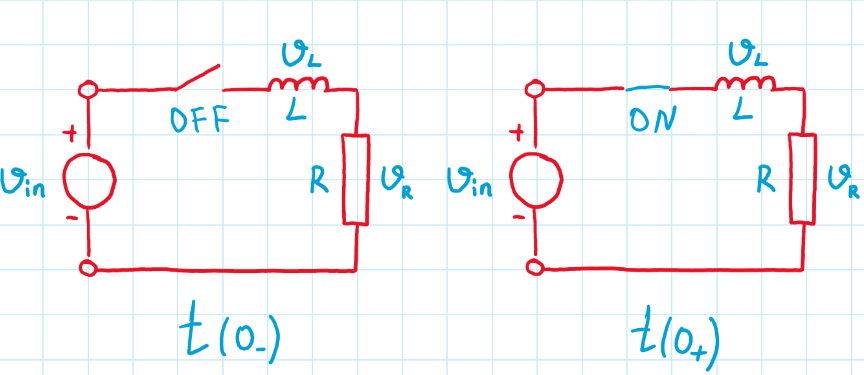

In [8]:
def g(R_sb, L_sb, V_sb):
    R, L, V, t = smp.symbols("R L V t")
    expr = V/R - V/R * smp.exp(-R/L *t) 
    t_values = np.arange(0, 0.05, 0.001)
    # Use list comprehension to substitute each x value into the vector expression
    result_vector = [expr.subs([(R, R_sb), (L, L_sb), (V, V_sb), (t, tim)]) for tim in t_values]
    
    # Create a scatter plot
    plt.scatter(t_values, result_vector)
    plt.xlabel('Час, [с]')
    plt.ylabel('Струм, [A]')
    plt.title('Перехідний процесс RL ланцюга')
    plt.show()

w = interactive(g, 
                R_sb=widgets.IntSlider(min=1, max=100, step=1, value=40, description = 'R'), 
                L_sb=widgets.FloatSlider(min=0.1, max=0.5, step=0.1, value=0.1, description ='L'), 
                V_sb=widgets.IntSlider(min=1, max=100, step=1, value=80, description = '$v_{in}$'))
display(w)

interactive(children=(IntSlider(value=40, description='R', min=1), FloatSlider(value=0.1, description='L', max…

<img src="Separator.png" alt="drawing"/>

### Приклад розрахунку струму контуру в аналітичному вигляді з використанням sympy.dsolve

Дифиренційне рівняння, яке описує електричну схему:

$$ L\frac{d^{2}i(t)}{dt^{2}} + R\frac{di(t)}{dt} + \frac{1}{C} \cdot i = 0 $$

Початкові умови:

$$ \begin{cases} i(0) = 0\\ L\cfrac{d i(t)}{dt} = 0 \end{cases}$$

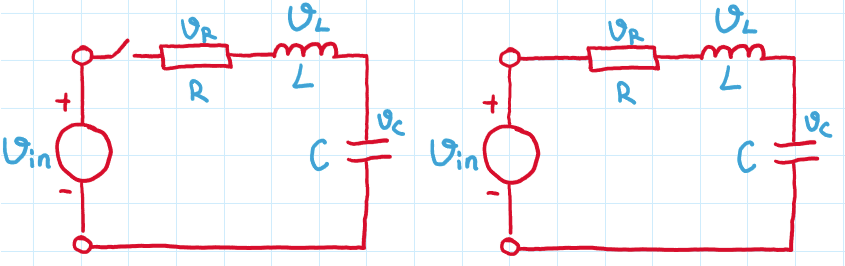

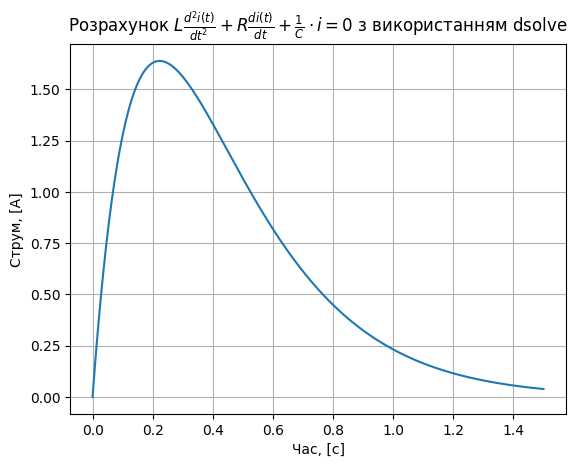

In [49]:
# Step 1: Define circuit parameters and initial conditions
R = 9  # Resistance (in ohms)
L = 1  # Inductance (in henrys)
C = 0.05  # Capacitance (in farads)
V = 20   # Applied DC voltage (in volts)

t = smp.symbols('t')  # Time symbol
I = smp.Function('I')(t)  # Current through the circuit

# Step 2: Set up the differential equation
eq = L * I.diff(t, 2) + R * I.diff(t) + 1/C * I
# Initial conditions (I(0) = 0, di/dt(0) = 0)
ics = {I.subs(t, 0): 0, L*smp.diff(I, t).subs(t, 0): V}

# Step 3: Solve the differential equation
sol = smp.dsolve(eq, I, ics=ics)

# Step 4: Convert symbolic solution to a callable function
I_func = smp.lambdify(t, sol.rhs, 'numpy')

# Step 5: Generate a range of time values
time_values = np.linspace(0, 1.5, 1000)  # Adjust the range as needed

# Step 6: Evaluate I(t) for each time point
current_values = np.array([I_func(ti) for ti in time_values])

# Step 7: Plot the graph
plt.plot(time_values, current_values)
plt.title('Розрахунок $ L\\frac{d^{2}i(t)}{dt^{2}} + R\\frac{di(t)}{dt} + \\frac{1}{C} \cdot i = 0 $ з використанням dsolve')
plt.xlabel('Час, [c]')
plt.ylabel('Струм, [A]')
plt.grid(True)
plt.show()

<img src="Separator.png" alt="drawing"/>

### Приклад розрахунку ряду Фурьє

Функція - $f(t) = t$

$$C_{0} = a_{0} = \cfrac{1}{T} \cdot \int_{0}^{T}  s(t) \cdot 1 dt$$

$$C_{0}^{cos} = a_{n} = \cfrac{2}{T} \cdot \int_{0}^{T}  s(t) \cdot cos(n \omega_{1} t) dt$$

$$C_{0}^{sin} = b_{n} = \cfrac{2}{T} \cdot \int_{0}^{T}  s(t) \cdot sin(n \omega_{1} t) dt$$


2*sin(t) - sin(2*t) + 2*sin(3*t)/3 - sin(4*t)/2 + 2*sin(5*t)/5 - sin(6*t)/3 + 2*sin(7*t)/7


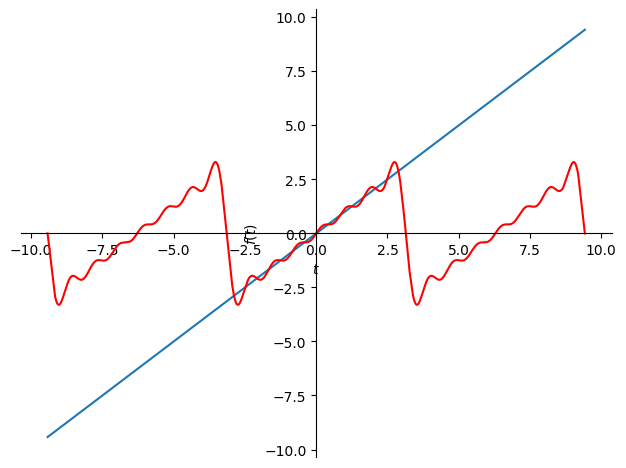

In [50]:
def f(t):
    return t

def a0():
    return 1/T*smp.integrate(
        f(t),
        (t, t0, t0 + T))

def a(n):
    return 2/T*smp.integrate(
        f(t)*smp.cos(2*smp.pi*n*t/T),
        (t, t0, t0 + T))

def b(n):
    return 2/T*smp.integrate(
        f(t)*smp.sin(2*smp.pi*n*t/T),
        (t, t0, t0 + T))

def S(N):
    return a0()+sum( a(n)*smp.cos(n*t*2*smp.pi/T)+b(n)*smp.sin(n*t*2*smp.pi/T) for n in range(1, N+1)).expand(complex=True).simplify()
        
T = 2*smp.pi
t0 = -smp.pi

t = smp.Symbol('t', real=True)

N = 7

analytic_approx = S(N).expand()
print(analytic_approx)

interval = (t, t0-T, t0+2*T)

### Тригонометричний ряд Фур'є
p1 = smp.plot(f(t), interval, show=False)
p2 = smp.plot(analytic_approx, interval, show=False)
p2[0].line_color = 'red'
p1.extend(p2)
p1.show()

## Використання PySpice

### Активний ФНЧ на операційному підсилювачі

Коефіцієнт підсилення 
$$ K_{0} = 1 + \cfrac{R_{3}}{R_{2}}$$

Частота зрізу 
$$ \omega_{0} = \cfrac{1}{R_{1} \cdot C}$$

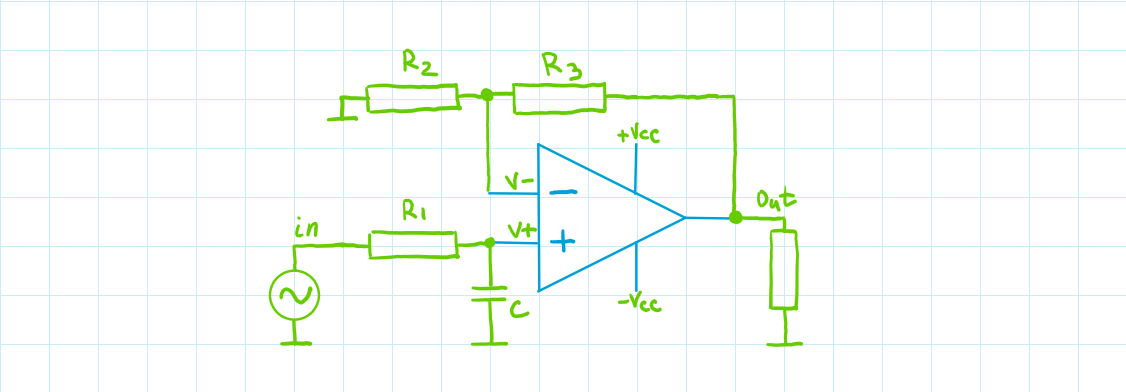

In [51]:
def g(R1_sb, R2_sb, R3_sb, C_sb, F_sb):
    ## Circuit Netlist
    circuit = Circuit('Low pass filter')
    circuit.include("uA741.lib")
    
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.001

    circuit.SinusoidalVoltageSource('Vsin', 'inp', circuit.gnd, offset=1, amplitude=0.1, frequency=F_sb@u_kHz)

    circuit.R(1, 'v+', 'inp',         R1_sb@u_kΩ)
    circuit.C(1, 'v+', circuit.gnd,  C_sb@u_nF)

    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')

    circuit.R(2, 'v-', circuit.gnd,  R2_sb@u_kΩ)
    circuit.R(3, 'v-', 'out',        R3_sb@u_kΩ)
    
    circuit.R('L', 'out', circuit.gnd, 100@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
        
    axe1.set_title('Активний ФНЧ на операційному підсилювачі')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['inp'], axis=axe1)
    axe1.set_ylim(-1, 3)  # Adjust limit for better visualization
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.set_ylim(-1, 4)  # Adjust limit for better visualization
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)


w = interactive(g,
                {'manual': True},
                R1_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{1}, [kOhm]$'),
                R2_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{2}, [kOhm]$'),
                R3_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{3}, [kOhm]$'),
                C_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$C_{1}, [nF]$'),
                F_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$F_{sw}, [kHz]$')
               )
display(w)

interactive(children=(IntSlider(value=45, description='$R_{1}, [kOhm]$', min=1), IntSlider(value=45, descripti…

---
### Активний ФВЧ на операційному підсилювачі

Коефіцієнт підсилення 
$$ K_{0} = 1 + \cfrac{R_{3}}{R_{2}}$$

Частота зрізу 
$$ \omega_{0} = \cfrac{1}{R_{1} \cdot C}$$

In [10]:
def g(R1_sb, R2_sb, R3_sb, C_sb, F_sb):
    ## Circuit Netlist
    circuit = Circuit('Op-amp circuits - Example 1 Non-inverting op-amp Amplifier')
    circuit.include("uA741.lib")
    
    # Define amplitude and frequency of input sinusoid
    amp = 0.2@u_V
    # Define transient simulation step time and stop time
    steptime = 0.1@u_us
    finaltime = 0.001

    source = circuit.SinusoidalVoltageSource('in', 'inp', circuit.gnd, offset=1, amplitude=0.5, frequency=F_sb@u_kHz)
    #source = circuit.SinusoidalVoltageSource('in', 'in', circuit.gnd, amplitude=1@u_V, frequency=F_sb@u_kHz)

    circuit.R(1, 'v+', circuit.gnd, R1_sb@u_kΩ)
    circuit.C(1, 'v+', 'inp',        10000@u_nF)

    # Power supply for the op-amp
    circuit.V(2, '+Vcc', circuit.gnd, 15@u_V)
    circuit.V(3, '-Vcc', circuit.gnd, -15@u_V)
    # Op-amp
    circuit.X(1, 'uA741', 'v+', 'v-', '+Vcc', '-Vcc', 'out')

    circuit.R(2, 'v-', circuit.gnd,  R2_sb@u_kΩ)
    circuit.R(3, 'v-', 'out',        R3_sb@u_kΩ)
    
    circuit.R('L', 'out', circuit.gnd, 1000@u_kΩ)
    
    ## Simulation: Transient Analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)
    
    # Compute FFT
    fft_out = np.fft.fft(analysis['out'])
    freqs = np.fft.fftfreq(len(analysis['out']), d=steptime)
    
    # PLOTTING COMMANDS
    figure, (axe1, axe2) = plt.subplots(2, 1, figsize=(10, 7))
        
    axe1.set_title('Активний ФВЧ на операційному підсилювачі')
    axe1.set_xlabel('Час [s]')
    axe1.set_ylabel('Вхідна напруга [V]')
    axe1.grid()
    plot(analysis['inp'], axis=axe1)
    axe1.set_ylim(-2, 2)  # Adjust limit for better visualization
    axe1.legend(('Вхід', 'Вхід'), loc=(.05, .1))
    cursor = Cursor(axe1, useblit=True, color='red', linewidth=1)
    
    axe2.set_title('')
    axe2.set_xlabel('Час [s]')
    axe2.set_ylabel('Вихідна напруга [V]')
    axe2.grid()
    plot(analysis['out'], axis=axe2)
    axe2.set_ylim(-2, 2)  # Adjust limit for better visualization
    axe2.legend(('Вихід', 'Вихід'), loc=(.05, .1))
    cursor = Cursor(axe2, useblit=True, color='red', linewidth=1)


w = interactive(g,
                {'manual': True},
                R1_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{1}, [kOhm]$'),
                R2_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{2}, [kOhm]$'),
                R3_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$R_{3}, [kOhm]$'),
                C_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$C_{1}, [nF]$'),
                F_sb=widgets.IntSlider(min=1, max=100, step=1, value=45, description ='$F_{sw}, [kHz]$')
               )
display(w)

interactive(children=(IntSlider(value=45, description='$R_{1}, [kOhm]$', min=1), IntSlider(value=45, descripti…

<img src="Separator.png" alt="drawing"/>

### Приклад розрахунку струму контуру в аналітичному вигляді з використанням PySpice

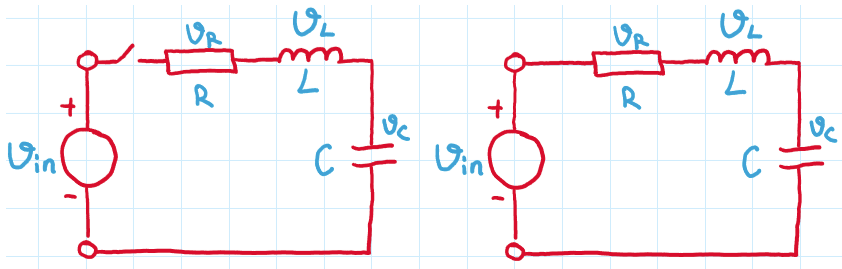

In [9]:
def g(R_sb, L_sb, C_sb):
    # Define circuit
    circuit = Circuit('RLC series connection')
    source = circuit.PulseVoltageSource('input', 1, circuit.gnd,
                                        initial_value=0@u_V, pulsed_value=10@u_V,
                                        pulse_width=100@u_ms, period=200@u_ms)
    # Define components
    circuit.R(1, 2, 1, R_sb@u_Ω)
    circuit.L(1, 3, 2, L_sb@u_mH)
    circuit.C(1, circuit.gnd, 3, C_sb@u_uF)

    # Perform transient analysis
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    steptime = 1@u_us
    finaltime = 200@u_ms
    analysis = simulator.transient(step_time=steptime, end_time=finaltime)

    # Plot the results
    figure, axe = plt.subplots(figsize=(10, 6))
    plt.title('Перехідний процес послідовно включених RLC')
    plt.xlabel('Час, [с]')
    plt.ylabel('Напруга, [В]')

    plot(analysis['1'], axis=axe)
    plot(analysis['3'], axis=axe)

    plt.grid()
    plt.legend(('Вхідний сигнал', 'Напруга на конденсаторі'), loc='best')
    cursor = Cursor(axe, useblit=True, color='red', linewidth=1)
    plt.tight_layout()
    plt.show()

w = interactive(g, 
                R_sb=widgets.IntSlider(min=0, max=1000, step=1, value=40, description = '$R_{1}, [\Omega]$'), 
                L_sb=widgets.IntSlider(min=1, max=1000, step=1, value=300, description ='$L_{1}, [uH]$'), 
                C_sb=widgets.IntSlider(min=1, max=1000, step=1, value=10, description = '$C_{1},[mF]$'))
display(w)

interactive(children=(IntSlider(value=40, description='$R_{1}, [\\Omega]$', max=1000), IntSlider(value=300, de…

### Приклад використання дискретного перетворення Фурьє для отримання спектру сигналу з мікрофона

In [53]:
import sounddevice as sd

# Define parameters
duration = 5  # seconds
sample_rate = 44100  # Hz

# Function to capture audio
def capture_audio(duration, sample_rate):
    print("Recording...")
    audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()
    print("Recording stopped.")
    return audio_data.flatten()

# Function to compute Fourier transform
def compute_fft(audio_data, sample_rate):
    print("Computing FFT...")
    n = len(audio_data)
    freqs = np.fft.fftfreq(n, d=1/sample_rate)
    fft_vals = np.abs(np.fft.fft(audio_data))
    print("FFT computed.")
    return freqs[:n//2], fft_vals[:n//2]

# Function to plot spectrum with limited frequency range
def plot_spectrum(freqs, fft_vals, max_freq=1400):
    print("Plotting spectrum...")
    plt.figure(figsize=(10, 4))
    plt.plot([262, 262], [0, 400], 'r')  # plotting t, b separately 
    plt.text(262, 200, '$\leftarrow$ Нота С 1 октава', fontsize=10)
    plt.plot([524, 524], [0, 400], 'r')  # plotting t, b separately 
    plt.text(524, 200, '$\leftarrow$ Нота С 2 октава', fontsize=10)
    plt.plot(freqs, fft_vals)
    plt.title('Спектр сигналу')
    plt.xlabel('Частота, [Гц]')
    plt.ylabel('Амплітуда')
    plt.grid(True)
    plt.xlim(0, max_freq)  # Limit x-axis from 0 to max_freq Hz
    plt.show()
    print("Spectrum plotted.")

Recording...
Recording stopped.
Computing FFT...
FFT computed.
Plotting spectrum...


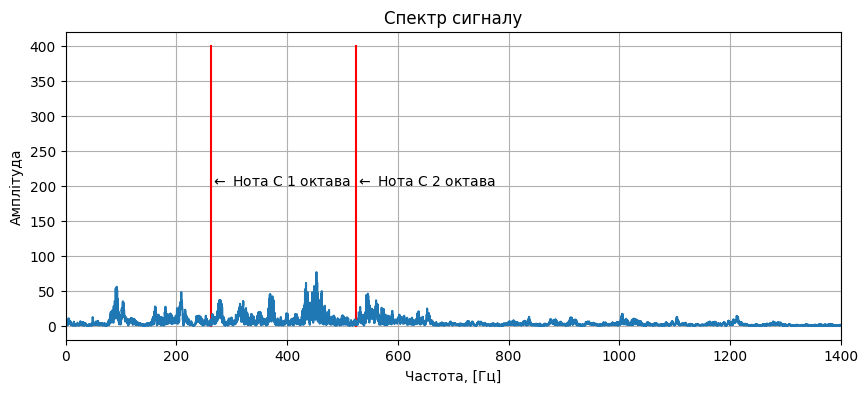

Spectrum plotted.


In [54]:
audio_data = capture_audio(duration, sample_rate)
freqs, fft_vals = compute_fft(audio_data, sample_rate)
plot_spectrum(freqs, fft_vals)